# Notebook 1

## Primeros pasos en cómputo científico

#### Python 🐍

> Dr. Ricardo Méndez Fragoso $\mathbb{R} i \vec c \hbar$

Comencemos con algunos ejemplos sobre la programación de funciones matemáticas que son de uso frecuente en cómputo científico. El objetivo es mostrar que se pueden programar funciones elementales con buena precisión y además podemos controlar esta última. Si bien es cierto que hay una gran cantidad de funciones programadas en los diferentes lenguajes de programación, es importante mostrar que siempre podemos tener el control sobre todo lo que necesitemos programar.

Veamos un ejemplo concreto con la función $\sin(x)$. El desarrollo de Taylor para la función $\sin (x)$ cerca del 0 es:

$$
\sin (x) = \sum _{n=0} ^{\infty} (-1)^n \frac{x^{2n+1}}{(2n+1)!} = x - \frac{x^3}{3!} + \frac{x^5}{5!} + ... 
$$

Sin embargo, en el caso computacional hay que truncar la serie hasta una cierta N que nos proporcione buena precisión en el intervalo deseado:
$$
\sin (x) = \sum _{n=0} ^{N} (-1)^n \frac{x^{2n+1}}{(2n+1)!} = x - \frac{x^3}{3!} + \frac{x^5}{5!} + ... + (-1)^N\frac{x^{2N+1}}{(2N+1)!}
$$

Antes de continuar tenemos que importar algunas bibliotecas útiles para su programación.

In [ ]:
from pylab import *

A continuación se programa la serie finita del $\sin (x)$ en donde se han puesto por defecto que se calculen 10 términos en la serie:

In [ ]:
def mi_sin(x,N=9):
    resultado  = 0
    for n in range(N+1):
        resultado += (-1)**n*((x**(2*n+1)) /math.factorial(2*n+1) )
    return resultado

Note que el último término que se calcula es con `n=9`. Una vez que hemos programado `mi_sin()` podemos ver un ejemplo con $\sin (\pi/4)$ y verificar el funcionamiento de nuestro pequeño programa:

In [ ]:
mi_sin(pi/4)

0.7071067811865475

También podemos cambiar la precisión a través del segundo parámetro. Con el siguiente ciclo `for` podemos ver como va convergiendo la función que programamos.

In [ ]:
print("Resultado analítico: ", 1/sqrt(2))
for i in range(10):
    print("Resultado con N=%d: " % i , mi_sin(pi/4,i) ) 

Resultado analítico:  0.7071067811865475
Resultado con N=0:  0.7853981633974483
Resultado con N=1:  0.7046526512091675
Resultado con N=2:  0.7071430457793603
Resultado con N=3:  0.7071064695751781
Resultado con N=4:  0.7071067829368671
Resultado con N=5:  0.7071067811796194
Resultado con N=6:  0.7071067811865679
Resultado con N=7:  0.7071067811865475
Resultado con N=8:  0.7071067811865475
Resultado con N=9:  0.7071067811865475


Se puede apreciar que los últimos dos términos ya no cambian debido a que se ha convergido.

También podemos probar la función para un conjunto de números:

In [ ]:
x=linspace(0,2*pi)
mi_sin(x)

array([ 0.        ,  0.12787716,  0.25365458,  0.375267  ,  0.49071755,
        0.59811053,  0.69568255,  0.78183148,  0.85514276,  0.91441262,
        0.95866785,  0.98718178,  0.99948622,  0.99537911,  0.97492791,
        0.93846842,  0.88659931,  0.82017225,  0.740278  ,  0.6482284 ,
        0.5455349 ,  0.43388374,  0.31510822,  0.19115863,  0.06407022,
       -0.06407022, -0.19115863, -0.31510822, -0.43388375, -0.54553492,
       -0.64822843, -0.74027807, -0.8201724 , -0.88659958, -0.93846893,
       -0.97492884, -0.99538079, -0.99948918, -0.98718697, -0.95867678,
       -0.91442777, -0.85516814, -0.78187347, -0.69575119, -0.59822147,
       -0.4908949 , -0.37554759, -0.25409407, -0.12855901, -0.00104818])

Podemos comparar con la función `sin()` que viene programada en la biblioteca de math en **Python**. Para 20 puntos en el intervalo  $[0,\pi/2]$ con 10 términos en la aproximación en la serie tenemos el siguiente resultado:

In [ ]:
x=linspace(0,pi/2,20)
print(abs(sin(x) - mi_sin(x)) )

[0.00000000e+00 1.38777878e-17 0.00000000e+00 0.00000000e+00
 5.55111512e-17 5.55111512e-17 5.55111512e-17 1.11022302e-16
 0.00000000e+00 0.00000000e+00 1.11022302e-16 0.00000000e+00
 2.22044605e-16 0.00000000e+00 0.00000000e+00 1.11022302e-16
 1.11022302e-16 2.22044605e-16 1.11022302e-16 0.00000000e+00]


Como se puede observar, la diferencia es cero o del orden de la precisión de la computadora. Esto nos da confianza en ver que lo que hemos programado funciona bastante bien en el intervalo $[0,\pi/2]$. Cabe mencionar que con esta función es suficiente, ya que la periodicidad de la función se puede utilizar para calcular el valor de $\sin(x)$ en cualquier otro intervalo módulo $\pi / 2$ y su respectivo signo. Esta última condición si es considerada por la función que viene programada en Python. A continuación podemos ver que la aproximación de nuestra función se va separando de lo que debería suceder si no se toma en cuenta la última afirmación sobre el dominio de la función.

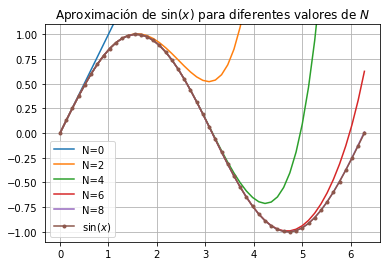

In [ ]:
x=linspace(0,2*pi)
for i in range(0,10,2):
    plot(x,mi_sin(x,i),label="N=%d" %i) 
plot(x,sin(x),".-",label="$\sin(x)$")
title("Aproximación de $\sin (x)$ para diferentes valores de $N$")
ylim([-1.1,1.1]),grid(),legend()
show()

Finalmente, vamos a medir el tiempo de ejecución promedio que tarda la ejecución nuestra función y posteriormente lo compararemos con el tiempo que tarda la función programada en la biblioteca de math en **Python**. Para ello utilizamos el macro `%%timeit` de Jupyter como se muestra a continuación.

In [ ]:
%%timeit
mi_sin(pi/4)

19.2 µs ± 4.63 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
%%timeit
sin(pi/4)

2.13 µs ± 267 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Como se puede apreciar, el tiempo de ejecución de nuestra función es más lento. Esto se debe a que aún faltaría optimizar nuestra función, algo que se puede hacer con algunos de los conocimientos que se adquieren a lo largo de este curso. En muchas ocasiones esta optimización no es sencilla, pero existen diferentes técnicas que se pueden aplicar para lograr este tipo de objetivos y que se verán más adelante en el curso.

[Regresar a la página del curso.](http://sistemas.fciencias.unam.mx/~rich/FisComp/)

Se agradece el apoyo del proyecto DGAPA-PAPIME:

+ PE 103021 nueva versión durante el año 2022. Versión interactiva en Colab.
+ PE 112919 durante el año 2020. Idea original.